
**Dataset**: Heartfailure Clinical Records Dataset

# <font size= 5.5, color=#4B52D2>Table Of Contents:</font>
- [Overview](#Overview) section describes the dataset used and the features in this dataset.
- [Data Preparation](#Data-Preparation) section covers data cleaning and data preparation steps. 
- [Data Exploration](#Data-Exploration) section explores dataset features and their inter-relationships. 
- [Statistical Modeling and Performance Evaluation](#Data-Modeling (Classification)) section first fits a full multiple linear regression model and performs diagnostic checks. Next, we perform backwards variable selection using p-values to obtain a reduced model, after which we perform another set of diagnostic checks on the reduced model.
- [Summary and Conclusions](#Summary-and-Conclusions) section provides a summary of our work and presents our findings.
- [References](#References)

# <font size= 5, color=#4B52D2>Overview</font>

This data set contains information about medical records of 299 heart failure patients, and the **goal** of this project is to analyse the data set to find features that contribute to patient mortality and classify if a new patient would survive while undergoing CVD treatment using 2 algorithms, KNN and Decision Tree. This dataset was sourced from Krembil Research Institute, Toronto, Canada and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020 [here](http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import pylab as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


# <font size= 5, color=#4B52D2>Data Preparation</font>

In [3]:
#pip install --upgrade pandas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

In [7]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [8]:
df['creatinine_phosphokinase'].nunique()

208

In [9]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [10]:
df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64

In [11]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [12]:
df['platelets'].value_counts()

263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
226000.00     4
228000.00     4
235000.00     4
237000.00     4
255000.00     4
302000.00     3
223000.00     3
254000.00     3
274000.00     3
244000.00     3
194000.00     3
283000.00     3
210000.00     3
327000.00     3
189000.00     3
249000.00     3
153000.00     3
265000.00     3
203000.00     3
220000.00     3
362000.00     3
149000.00     3
172000.00     2
216000.00     2
270000.00     2
390000.00     2
334000.00     2
215000.00     2
266000.00     2
277000.00     2
406000.00     2
365000.00     2
173000.00     2
242000.00     2
222000.00     2
304000.00     2
231000.00     2
133000.00     2
147000.00     2
219000.00     2
389000.00     2
267000.00     2
253000.00     2
276000.00     2
196000.00     2
297000.00     2
166000.00     2
262000.00     2
319000.00     2
127000.00     2
329000.00     2
185000.00     2
162000.00     2
218000.00     2
204000.00     2
368000.00     2
351000.00     2
451000.0

In [13]:
df['serum_creatinine'].value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

In [14]:
df['serum_sodium'].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64

In [15]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [16]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [17]:
df['time'].value_counts()

250    7
187    7
10     6
186    6
107    6
30     5
209    5
244    5
95     5
214    5
146    5
88     5
87     5
79     5
245    5
147    4
90     4
121    4
120    4
215    4
74     4
180    3
43     3
60     3
246    3
94     3
33     3
207    3
26     3
205    3
213    3
212    3
108    3
109    3
174    3
172    3
83     3
82     2
80     2
112    2
85     2
91     2
104    2
201    2
197    2
196    2
113    2
78     2
115    2
210    2
256    2
7      2
8      2
11     2
14     2
15     2
20     2
270    2
23     2
258    2
28     2
192    2
29     2
145    2
237    2
54     2
233    2
230    2
65     2
72     2
73     2
175    1
185    1
193    1
195    1
194    1
188    1
211    1
198    1
240    1
280    1
278    1
271    1
257    1
247    1
241    1
235    1
200    1
231    1
220    1
216    1
170    1
208    1
206    1
171    1
4      1
162    1
154    1
67     1
66     1
64     1
63     1
61     1
59     1
55     1
50     1
45     1
44     1
42     1
41     1
40     1
3

In [18]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Task 2: Data Exploration

## 2.1 Exploring each column

In [19]:
pip show pandas 

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/anaconda3/lib/python3.7/site-packages
Requires: pytz, python-dateutil, numpy
Required-by: statsmodels, seaborn
Note: you may need to restart the kernel to use updated packages.


In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [21]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Age Column

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


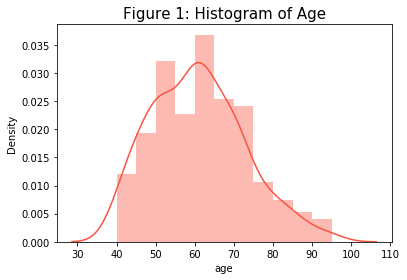

In [22]:
sns.distplot(df['age'], kde = True, color = '#f85441', bins = 11).set_title('Figure 1: Histogram of Age', fontsize = 15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


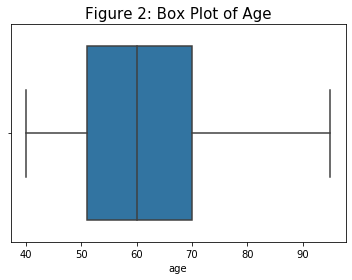

In [23]:
sns.boxplot(df['age']).set_title('Figure 2: Box Plot of Age', fontsize = 15)
plt.show();

### Anaemia Column

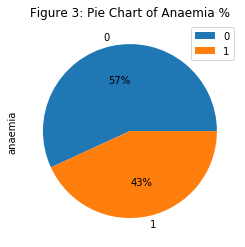

In [24]:
df['anaemia'].value_counts().plot(kind='pie',legend=True,title='Figure 3: Pie Chart of Anaemia %',autopct='%1.0f%%')

### Creatinine Phosphokinase Column

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


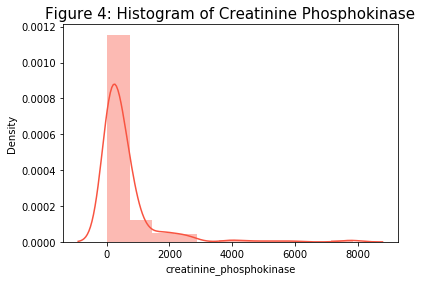

In [25]:
sns.distplot(df['creatinine_phosphokinase'], kde = True, color = '#f85441', bins = 11).set_title('Figure 4: Histogram of Creatinine Phosphokinase', fontsize = 15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


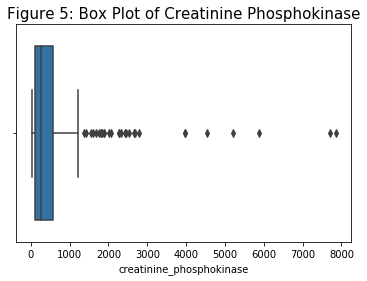

In [26]:
sns.boxplot(df['creatinine_phosphokinase']).set_title('Figure 5: Box Plot of Creatinine Phosphokinase', fontsize = 15)
plt.show();

### Diabetes Column

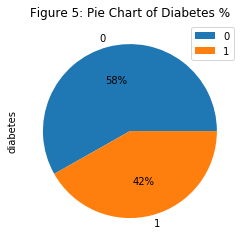

In [27]:
df['diabetes'].value_counts().plot(kind='pie',legend=True,title='Figure 5: Pie Chart of Diabetes %',autopct='%1.0f%%')

### Ejection Fraction Column

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


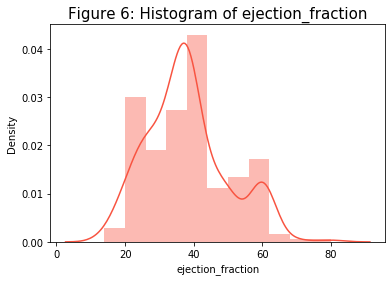

In [28]:
sns.distplot(df['ejection_fraction'], kde = True, color = '#f85441', bins = 11).set_title('Figure 6: Histogram of ejection_fraction', fontsize = 15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


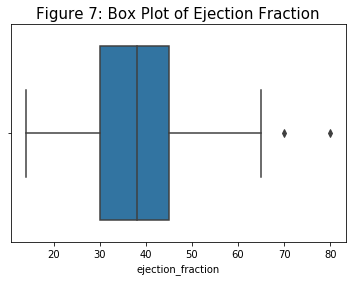

In [29]:
sns.boxplot(df['ejection_fraction']).set_title('Figure 7: Box Plot of Ejection Fraction', fontsize = 15)
plt.show();

### High Blood Pressure Column

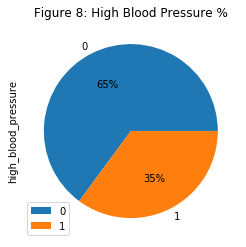

In [30]:
df['high_blood_pressure'].value_counts().plot(kind='pie',legend=True,title='Figure 8: High Blood Pressure %',autopct='%1.0f%%')

### Platelets

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


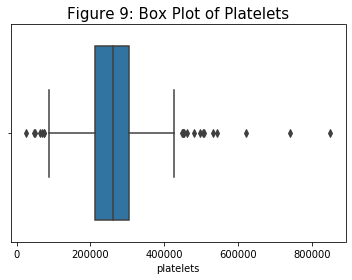

In [31]:
sns.boxplot(df['platelets']).set_title('Figure 9: Box Plot of Platelets', fontsize = 15)
plt.show();

In [32]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


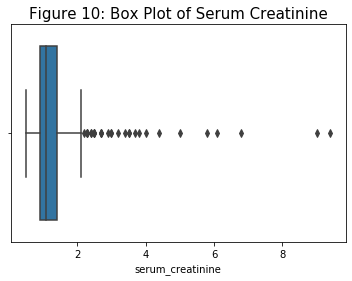

In [33]:
sns.boxplot(df['serum_creatinine']).set_title('Figure 10: Box Plot of Serum Creatinine', fontsize = 15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


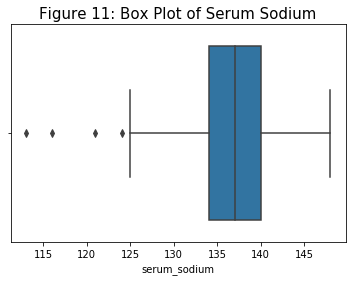

In [34]:
sns.boxplot(df['serum_sodium']).set_title('Figure 11: Box Plot of Serum Sodium', fontsize = 15)
plt.show();

In [35]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

Text(0.5, 1.0, 'Figure 12: Bar charts of gender:')

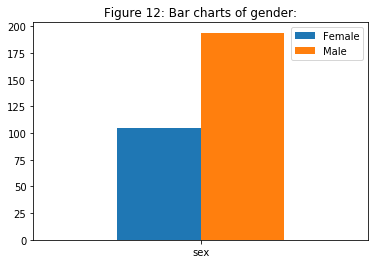

In [36]:
Female = [105]
Male = [194]
index = ['sex']
ds = pd.DataFrame({'Female': Female,'Male': Male}, index=index)
ax = ds.plot.bar(rot=0)
ax.set_title('Figure 12: Bar charts of gender:')

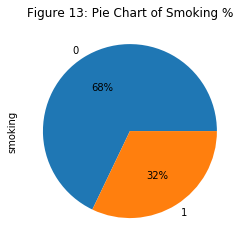

In [37]:
df['smoking'].value_counts().plot(kind='pie',autopct='%1.0f%%', title ='Figure 13: Pie Chart of Smoking %')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


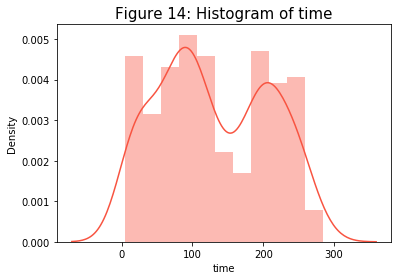

In [38]:
sns.distplot(df['time'], kde = True, color = '#f85441', bins = 11).set_title('Figure 14: Histogram of time', fontsize = 15)
plt.show();


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Explore the relationship between all pairs of attributes (or at least 10 pairs of at- tributes, if there are more in the data), and show the relationship in an appropriate graphs. You may choose which pairs of columns to focus on, but you need to gen- erate a visualisation graph for each pair of attributes. Each of the attribute pair should address a plausible hypothesis for the data concerned. In your report, for each plot (pair of attributes), state the hypothesis that you are investigating. Then, briefly discuss any interesting relationships (or lack of relationships) that you can observe from your visualisation.

## 2.2 Exploring the relationship between variables

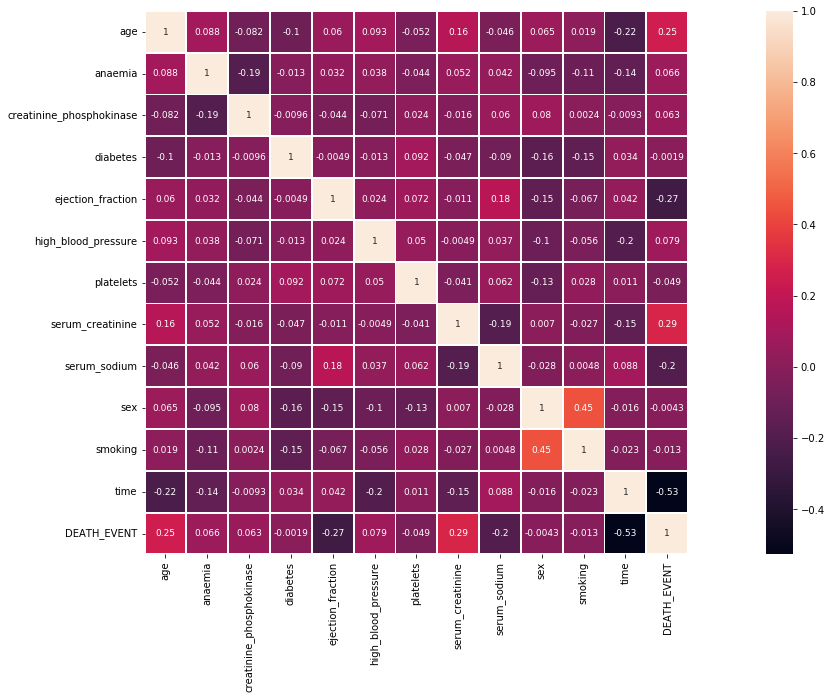

In [40]:
f, ax = plt.subplots(figsize=(28, 10))
ax = sns.heatmap(df.corr(), linewidths=.9,annot=True,annot_kws={'size': 9},square=True)

### Age vs. Anaemia

In [41]:
#pip install --upgrade seaborn 

[Text(0.5, 1.0, 'Figure 15: Histogram of Creatinine Phosphokinase and Death')]

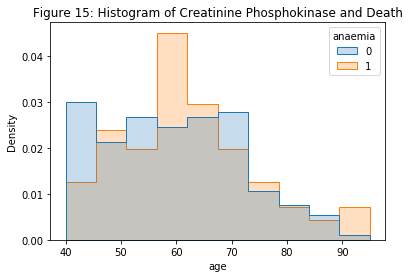

In [42]:
sns.histplot(
    df,x='age',hue="anaemia", element="step",
    stat="density", common_norm=False,
).set(title='Figure 15: Histogram of Creatinine Phosphokinase and Death')

### Age vs. Diabetes

[Text(0.5, 1.0, 'Figure 16: Histogram of Age and Diabetes')]

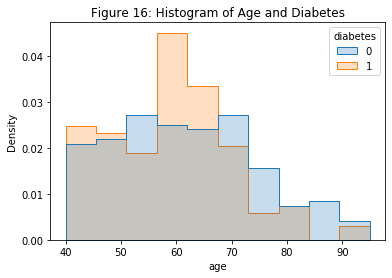

In [43]:
sns.histplot(
    df,x='age',hue="diabetes", element="step",
    stat="density", common_norm=False,
).set(title='Figure 16: Histogram of Age and Diabetes')

### Age vs. Ejection Fraction

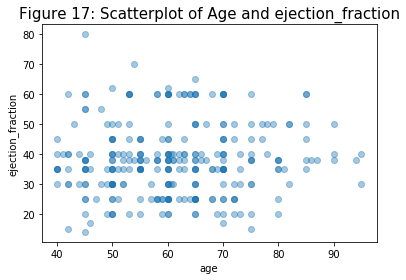

In [44]:
plt.scatter(df['age'], df['ejection_fraction'], alpha = 0.4)
plt.title('Figure 17: Scatterplot of Age and ejection_fraction', fontsize = 15)
plt.xlabel('age')
plt.ylabel('ejection_fraction')
plt.show();

### Age vs. High Blood Pressure

[Text(0.5, 1.0, 'Figure 18: Histogram of Age and High Blood Pressure')]

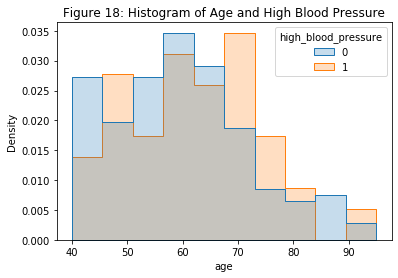

In [45]:
sns.histplot(
    df,x='age',hue="high_blood_pressure", element="step",
    stat="density", common_norm=False,
).set(title='Figure 18: Histogram of Age and High Blood Pressure')

### Age vs. Smoking

[Text(0.5, 1.0, 'Figure 19: Histogram of Age and Smoking')]

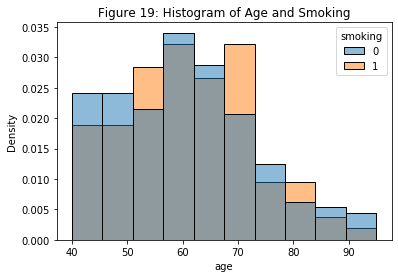

In [46]:
sns.histplot(
    df,x='age',hue="smoking",
    stat="density", common_norm=False,
).set(title='Figure 19: Histogram of Age and Smoking')

### Age vs. Death

[Text(0.5, 1.0, 'Figure 20: Histogram of Age and Death')]

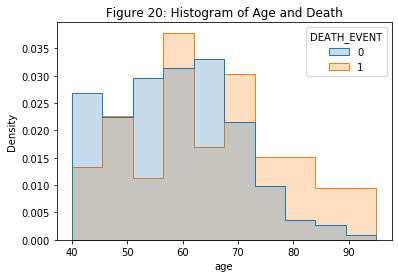

In [47]:
sns.histplot(
    df,x='age',hue="DEATH_EVENT", element="step",
    stat="density", common_norm=False,
).set(title='Figure 20: Histogram of Age and Death')

### Anaemia vs. Creatinine phosphokinase 

[Text(0.5, 1.0, 'Figure 21: Histogram of Anaemia and Creatinine Phosphokinase')]

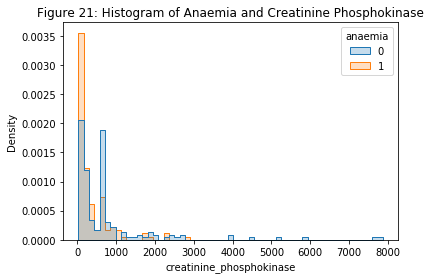

In [48]:
sns.histplot(
    df,x='creatinine_phosphokinase',hue="anaemia", element="step",
    stat="density", common_norm=False,
).set(title='Figure 21: Histogram of Anaemia and Creatinine Phosphokinase')

### Anaemia vs High Blood Pressure

[Text(0.5, 1.0, 'Figure 22: Piechart of Anaemia and Creatinine Phosphokinase')]

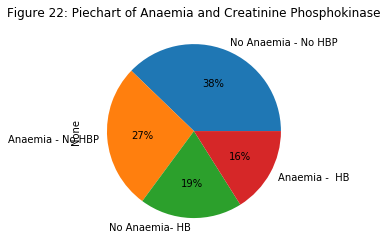

In [49]:
df[['anaemia','high_blood_pressure']].value_counts().plot(kind='pie',labels=['No Anaemia - No HBP','Anaemia - No HBP','No Anaemia- HB','Anaemia -  HB'],autopct='%1.0f%%').set(title='Figure 22: Piechart of Anaemia and Creatinine Phosphokinase')



### Anaemia vs. Platelets


[Text(0.5, 1.0, 'Figure 23: Histogram of Anaemia and Platelets')]

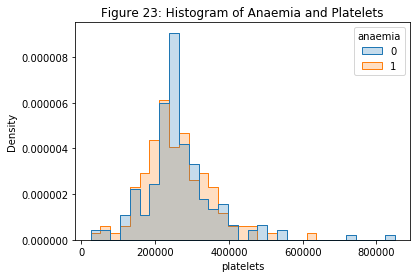

In [50]:
sns.histplot(
    df,x='platelets',hue="anaemia", element="step",
    stat="density", common_norm=False,
).set(title='Figure 23: Histogram of Anaemia and Platelets')

### Anaemia vs Death

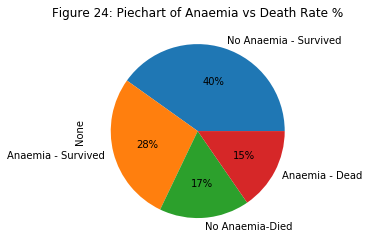

In [51]:
df[['anaemia','DEATH_EVENT']].value_counts().plot(kind='pie',labels=['No Anaemia - Survived','Anaemia - Survived','No Anaemia-Died','Anaemia - Dead'],autopct='%1.0f%%',title='Figure 24: Piechart of Anaemia vs Death Rate %')

### Creatinine phosphokinase vs High Blood Pressure


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0.5, 1.0, 'Figure 25: Boxplot of Creatinine phosphokinase and High Blood Pressure')]

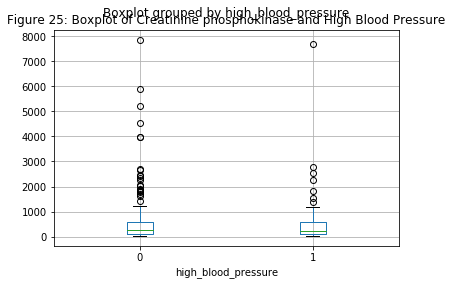

In [52]:
df.dropna().boxplot(column='creatinine_phosphokinase',by='high_blood_pressure').set(title='Figure 25: Boxplot of Creatinine phosphokinase and High Blood Pressure')


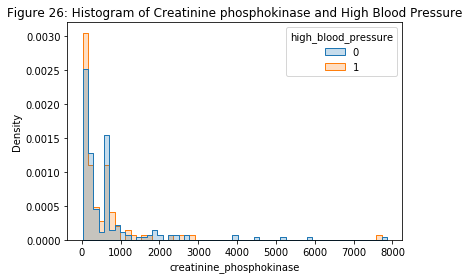

In [53]:
a=sns.histplot(
    df,x='creatinine_phosphokinase',hue="high_blood_pressure", element="step",
    stat="density", common_norm=False,
).set(title='Figure 26: Histogram of Creatinine phosphokinase and High Blood Pressure')

### Creatinine phosphokinase vs sex

[Text(0.5, 1.0, 'Figure 27: Bar Graph of Creatinine Phosphokinase and Death')]

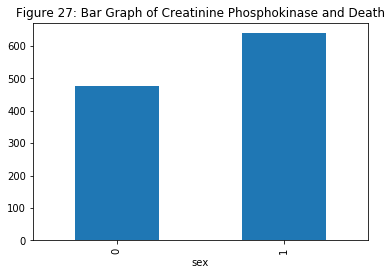

In [54]:
df.groupby('sex')['creatinine_phosphokinase'].describe()['mean'].plot(kind='bar').set(title='Figure 27: Bar Graph of Creatinine Phosphokinase and Death')


### Creatinine phosphokinase vs death

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'creatinine_phosphokinase')

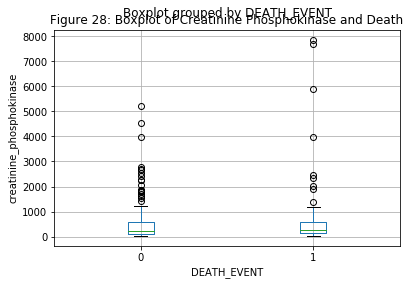

In [55]:
df.dropna().boxplot(column='creatinine_phosphokinase',by='DEATH_EVENT').set(title='Figure 28: Boxplot of Creatinine Phosphokinase and Death')
plt.ylabel('creatinine_phosphokinase')

[Text(0.5, 1.0, 'Figure 29: Histogram of Creatinine Phosphokinase and Death')]

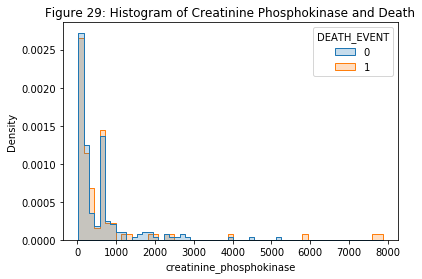

In [56]:
sns.histplot(
    df,x='creatinine_phosphokinase',hue="DEATH_EVENT", element="step",
    stat="density",common_norm=False).set(title='Figure 29: Histogram of Creatinine Phosphokinase and Death')

### Creatinine phosphokinase vs Platelets

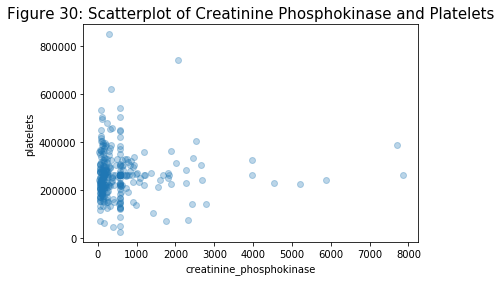

In [57]:
plt.scatter(df['creatinine_phosphokinase'], df['platelets'], alpha = 0.3)
plt.title('Figure 30: Scatterplot of Creatinine Phosphokinase and Platelets', fontsize = 15)
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('platelets')
plt.show();

### Diabetes vs Death

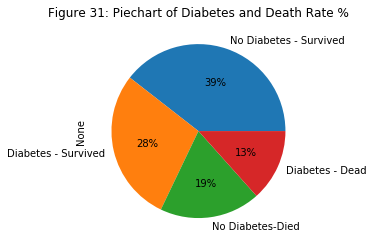

In [58]:
df[['diabetes','DEATH_EVENT']].value_counts().plot(kind='pie',labels=['No Diabetes - Survived','Diabetes - Survived','No Diabetes-Died','Diabetes - Dead'],autopct='%1.0f%%',title='Figure 31: Piechart of Diabetes and Death Rate %')

### Ejection Fraction vs Creatinine phosphokinase 

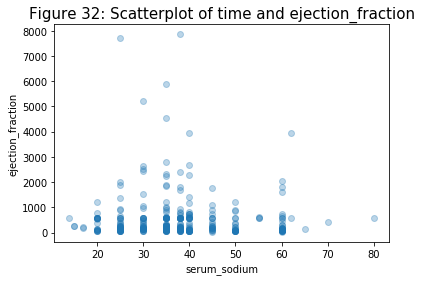

In [59]:
plt.scatter(df['ejection_fraction'], df['creatinine_phosphokinase'], alpha = 0.3)
plt.title('Figure 32: Scatterplot of time and ejection_fraction', fontsize = 15)
plt.xlabel('serum_sodium')
plt.ylabel('ejection_fraction') 
plt.show();

### Ejection Fraction vs High Blood Pressure


[Text(0.5, 1.0, 'Figure 33: Histogram of Ejection Fraction and High Blood Pressure')]

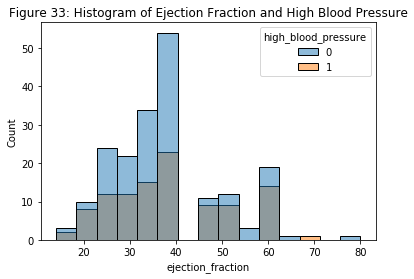

In [60]:
sns.histplot(
    df,x='ejection_fraction',hue="high_blood_pressure"
).set(title='Figure 33: Histogram of Ejection Fraction and High Blood Pressure')

### Ejection Fraction vs Serum Sodium

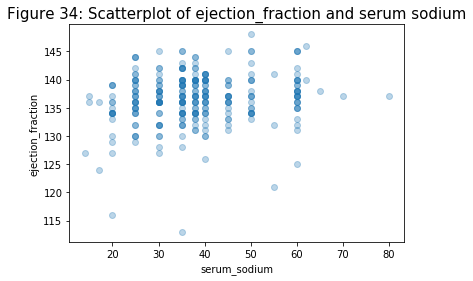

In [61]:
plt.scatter(df['ejection_fraction'], df['serum_sodium'], alpha = 0.3)
plt.title('Figure 34: Scatterplot of ejection_fraction and serum sodium', fontsize = 15)
plt.xlabel('serum_sodium')
plt.ylabel('ejection_fraction')
plt.show();


### Ejection Fraction vs Smoking

<Figure size 432x288 with 0 Axes>

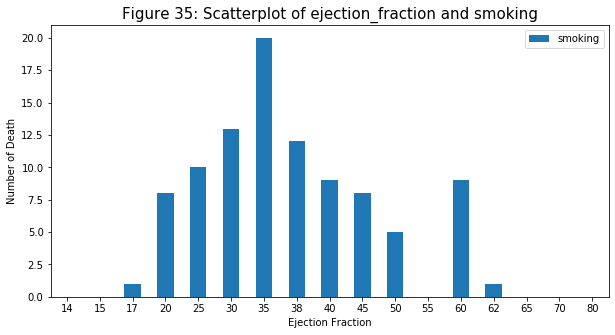

In [62]:
plt.clf()
ds2 = df [['ejection_fraction' , 'smoking']]
ds2.groupby('ejection_fraction').sum().plot(kind='bar',figsize=(10,5),rot = 0)
plt.title('Figure 35: Scatterplot of ejection_fraction and smoking', fontsize = 15)
plt.xlabel('Ejection Fraction')
plt.ylabel('Number of Death')
plt.show()

### Ejection Fraction vs Time


Text(0, 0.5, 'Time')

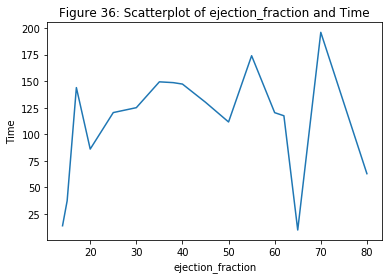

In [63]:
ejFrac_df = pd.DataFrame(df.groupby('ejection_fraction')['time'].mean())
ejFrac_df["time"].plot(kind='line')
plt.title('Figure 36: Scatterplot of ejection_fraction and Time', fontsize = 12)
plt.xlabel("ejection_fraction")
plt.ylabel("Time")

### Ejection Fraction vs Smoking

In [64]:
mask_normal=(df['ejection_fraction']>=50)
mask_borderline=(df['ejection_fraction']>=41) & (df['ejection_fraction']<=49)
mask_reduced=df['ejection_fraction']<=40

sample_df=pd.DataFrame(columns=['Category','Deaths'])
sample_df.loc[len(sample_df)]=['Normal Ejection Fraction',df[mask_normal]['DEATH_EVENT'].sum()]
sample_df.loc[len(sample_df)]=['BorderLine Ejection Fraction',df[mask_borderline]['DEATH_EVENT'].sum()]
sample_df.loc[len(sample_df)]=['Reduced Ejection Fraction',df[mask_reduced]['DEATH_EVENT'].sum()]

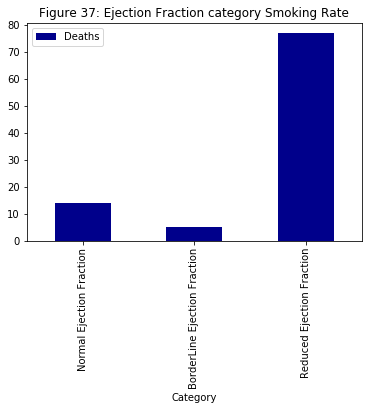

In [65]:
sample_df.plot(kind='bar',x=0,color='darkblue', title='Figure 37: Ejection Fraction category Smoking Rate')


### Ejection Fraction vs Death

In [66]:
mask_normal=(df['ejection_fraction']>=50)
mask_borderline=(df['ejection_fraction']>=41) & (df['ejection_fraction']<=49)
mask_reduced=df['ejection_fraction']<=40

sample_df=pd.DataFrame(columns=['Category','Deaths'])
sample_df.loc[len(sample_df)]=['Normal Ejection Fraction',df[mask_normal]['DEATH_EVENT'].sum()]
sample_df.loc[len(sample_df)]=['BorderLine Ejection Fraction',df[mask_borderline]['DEATH_EVENT'].sum()]
sample_df.loc[len(sample_df)]=['Reduced Ejection Fraction',df[mask_reduced]['DEATH_EVENT'].sum()]

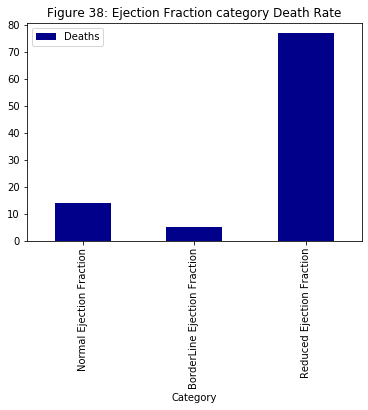

In [67]:
sample_df.plot(kind='bar',x=0,color='darkblue', title='Figure 38: Ejection Fraction category Death Rate')

In [68]:
sample_df

,Category,Deaths
0,Normal Ejection Fraction,14
1,BorderLine Ejection Fraction,5
2,Reduced Ejection Fraction,77


### High Blood Pressure vs Death

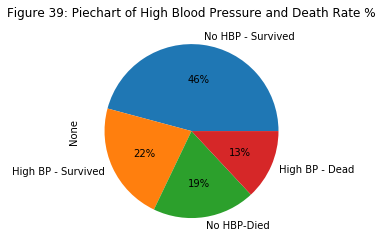

In [69]:
df[['high_blood_pressure','DEATH_EVENT']].value_counts().plot(kind='pie',labels=['No HBP - Survived','High BP - Survived','No HBP-Died','High BP - Dead'],autopct='%1.0f%%',title='Figure 39: Piechart of High Blood Pressure and Death Rate %')

### Platelets vs High Blood Pressure

[Text(0.5, 1.0, 'Figure 40: Histogram of Platelets and High Blood Pressure')]

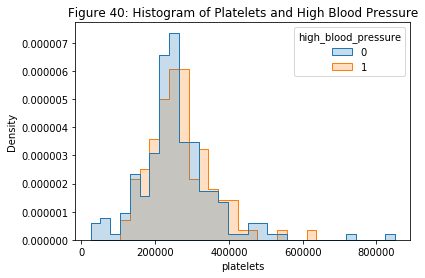

In [70]:
sns.histplot(
    df,x='platelets',hue="high_blood_pressure", element="step",
    stat="density", common_norm=False,
).set(title='Figure 40: Histogram of Platelets and High Blood Pressure')

### Platelets vs Sex

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'platelets')

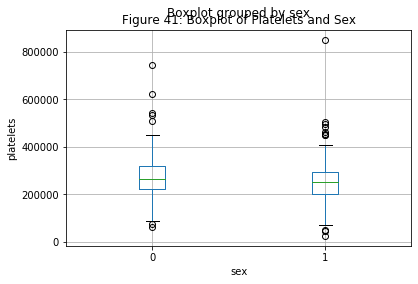

In [71]:
df.dropna().boxplot(column='platelets',by='sex').set(title='Figure 41: Boxplot of Platelets and Sex')
plt.ylabel('platelets')

### Platelets vs Smoking

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'platelets')

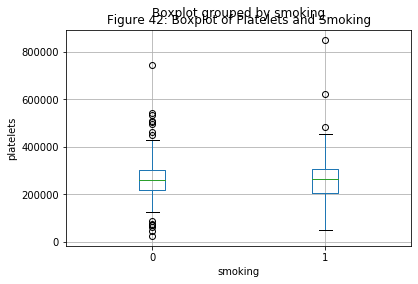

In [72]:
df.dropna().boxplot(column='platelets',by='smoking').set(title='Figure 42: Boxplot of Platelets and Smoking')
plt.ylabel('platelets')

### Platelets vs Death

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'platelets')

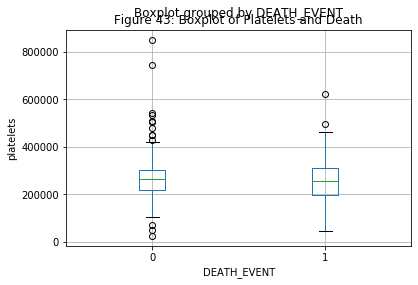

In [73]:
df.dropna().boxplot(column='platelets',by='DEATH_EVENT').set(title='Figure 43: Boxplot of Platelets and Death')
plt.ylabel('platelets')

### Serum Creatinine vs Creatinine phosphokinase 

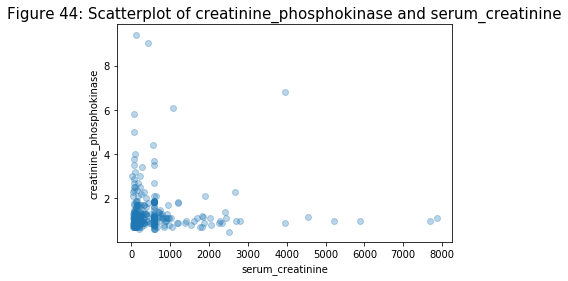

In [74]:
plt.scatter(df['creatinine_phosphokinase'], df['serum_creatinine'], alpha = 0.3)
plt.title('Figure 44: Scatterplot of creatinine_phosphokinase and serum_creatinine', fontsize = 15)
plt.xlabel('serum_creatinine')
plt.ylabel('creatinine_phosphokinase')
plt.show();

### Serum Creatinine vs Sex

Text(0, 0.5, 'serum_creatinine')

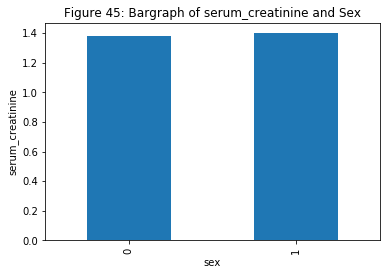

In [75]:
df.groupby('sex').describe()['serum_creatinine']['mean'].plot(kind='bar').set(title='Figure 45: Bargraph of serum_creatinine and Sex')
plt.ylabel('serum_creatinine')

### Serum Creatinine vs Death

[Text(0.5, 1.0, 'Figure 45: Histogram of Serum Creatinine and Death')]

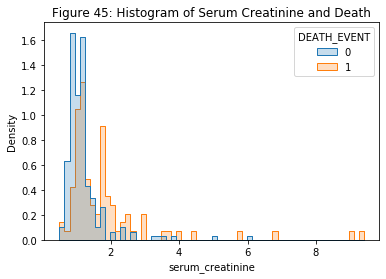

In [76]:
sns.histplot(
    df,x='serum_creatinine',hue="DEATH_EVENT", element="step",
    stat="density", common_norm=False,
).set(title='Figure 45: Histogram of Serum Creatinine and Death')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'serum_creatinine')

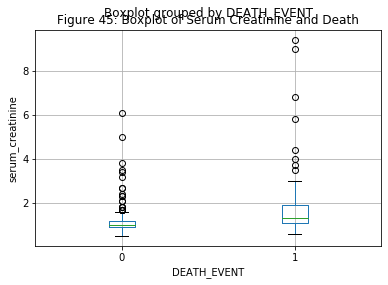

In [77]:
df.dropna().boxplot(column='serum_creatinine',by='DEATH_EVENT').set(title='Figure 45: Boxplot of Serum Creatinine and Death')
plt.ylabel('serum_creatinine')

<Figure size 432x288 with 0 Axes>

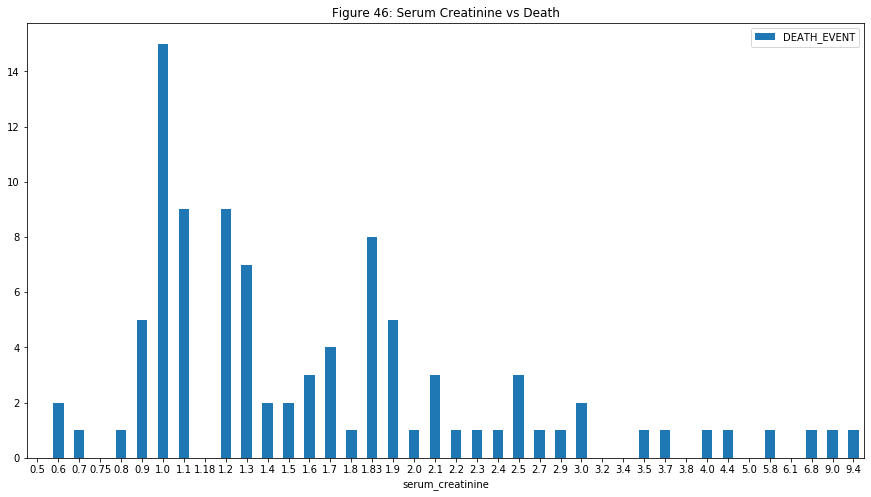

In [78]:
plt.clf()
ds2 = df [['serum_creatinine' , 'DEATH_EVENT']]
ds2.groupby('serum_creatinine').sum().plot(kind='bar',figsize=(15,8),rot = 0, title='Figure 46: Serum Creatinine vs Death')
plt.show()

### Smoking vs Death

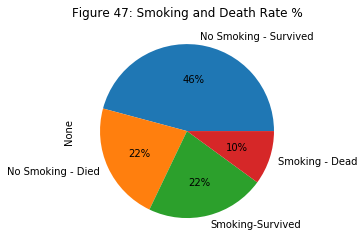

In [79]:
df[['smoking','DEATH_EVENT']].value_counts().plot(kind='pie',labels=['No Smoking - Survived','No Smoking - Died','Smoking-Survived','Smoking - Dead'],autopct='%1.0f%%',title='Figure 47: Smoking and Death Rate %')

### Serum Sodium vs Creatinine phosphokinase 

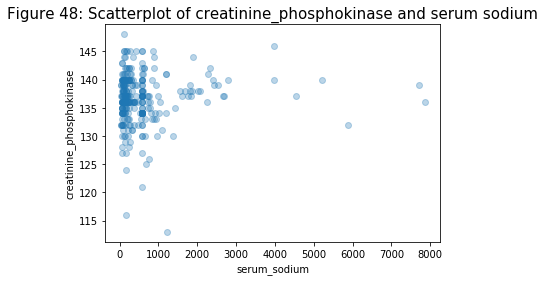

In [80]:
plt.scatter(df['creatinine_phosphokinase'], df['serum_sodium'], alpha = 0.3)
plt.title('Figure 48: Scatterplot of creatinine_phosphokinase and serum sodium', fontsize = 15)
plt.xlabel('serum_sodium')
plt.ylabel('creatinine_phosphokinase')
plt.show();

### Serum Sodium vs High Blood Pressure

Text(0, 0.5, 'serum_sodium')

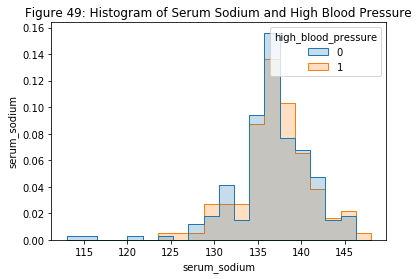

In [81]:
sns.histplot(
    df,x='serum_sodium',hue="high_blood_pressure", element="step",
    stat="density", common_norm=False,
).set(title='Figure 49: Histogram of Serum Sodium and High Blood Pressure')
plt.ylabel('serum_sodium')

### Serum Sodium vs Smoking

<Figure size 432x288 with 0 Axes>

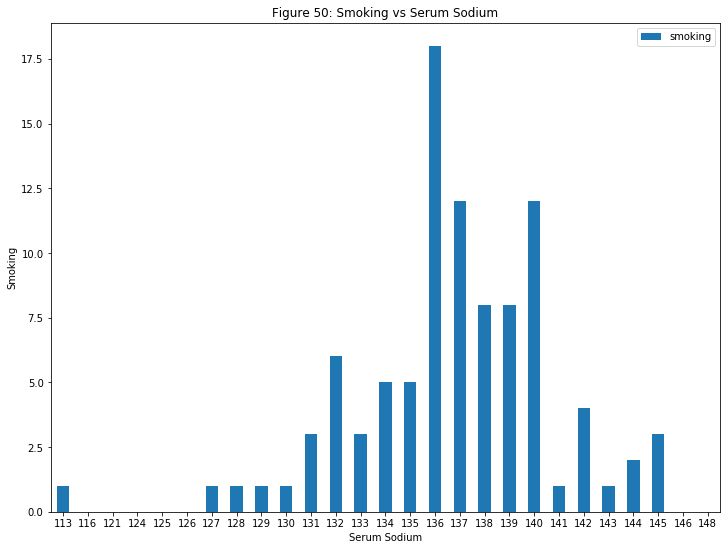

In [82]:
plt.clf()
ds2 = df [['serum_sodium' , 'smoking']]
ds2.groupby('serum_sodium').sum().plot(kind='bar',figsize=(12,9),rot = 0, title ='Figure 50: Smoking vs Serum Sodium')
plt.xlabel('Serum Sodium')
plt.ylabel('Smoking')
plt.show()

### Serum Sodium vs Death

[Text(0.5, 1.0, 'Figure 51: Histogram of Serum Sodium and Death')]

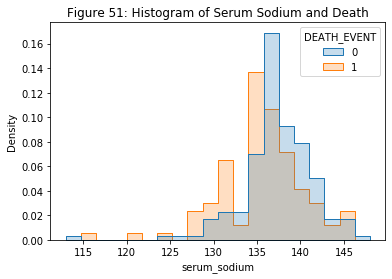

In [83]:
sns.histplot(
    df,x='serum_sodium',hue="DEATH_EVENT", element="step",
    stat="density", common_norm=False,
).set(title='Figure 51: Histogram of Serum Sodium and Death')

### Sex vs Death

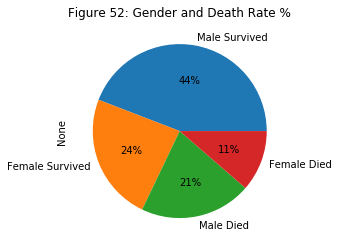

In [84]:
df[['sex','DEATH_EVENT']].value_counts().plot(kind='pie',labels=['Male Survived','Female Survived','Male Died','Female Died'],autopct='%1.0f%%',title='Figure 52: Gender and Death Rate %')


### Time vs Death

[Text(0.5, 1.0, 'Figure 53: Histogram of Time and Death')]

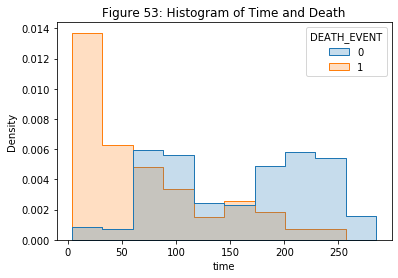

In [85]:
sns.histplot(
    df,x='time',hue="DEATH_EVENT", element="step",
    stat="density", common_norm=False,
).set(title='Figure 53: Histogram of Time and Death')

In [86]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Task 3: Data Modelling

KNN (k-nearest neighbors algorithm) as the first model, some advantages include no training Period, it stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc. Due to this, new data can be added seamlessly which will not impact the accuracy of the algorithm. It's very easy to implement. There are only two parameters required to implement KNN and we'll be using best one out of the 3 distance metrics (e.g. Euclidean, Manhattan, Minkowski etc.)

Some disadvantages include it doesn't work well with large dataset as the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm. Moreover doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. Needs Feature Scaling, (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

In [87]:
# Selecting Best Features in KNN
X=df.drop('DEATH_EVENT', axis='columns').values

In [88]:
y=df['DEATH_EVENT']

In [89]:
col_num=X.shape[1]
new_Ind=[]
cur_MaxScore=0.0
col_Ind_random=shuffle(range(0,col_num),random_state=1)

In [90]:
# Using Hill climbing for feature Selection
for cur_f in range(0,col_num):
    new_Ind.append(col_Ind_random[cur_f])
    newData=X[:,new_Ind].copy()
    X_train,X_test,y_train,y_test=train_test_split(newData,y,test_size=0.25,random_state=0)
    clf=KNeighborsClassifier() #apply knn for the default value
    fit=clf.fit(X_train,y_train)
    cur_Score=clf.score(X_test,y_test)
    if cur_Score<cur_MaxScore:
        new_Ind.remove(col_Ind_random[cur_f])
    else:
        cur_MaxScore=cur_Score
        print("Score with "+str(len(new_Ind))+"Selected features: "+str(cur_Score))

Score with 1Selected features: 0.6
Score with 2Selected features: 0.6
Score with 3Selected features: 0.6
Score with 4Selected features: 0.6
Score with 5Selected features: 0.6
Score with 6Selected features: 0.7466666666666667
Score with 7Selected features: 0.7466666666666667
Score with 8Selected features: 0.7466666666666667
Score with 9Selected features: 0.7466666666666667


In [91]:
new_Ind

[2, 10, 1, 0, 7, 11, 9, 8, 5]

In [92]:
selected_features_knn=df.columns[new_Ind].tolist()
selected_features_knn

['creatinine_phosphokinase',
 'smoking',
 'anaemia',
 'age',
 'serum_creatinine',
 'time',
 'sex',
 'serum_sodium',
 'high_blood_pressure']

### KNN Model with All set of Features
We evaluate the score for KNN model with all features.

In [93]:
X=df.drop('DEATH_EVENT', axis='columns').values
y=df['DEATH_EVENT']

In [94]:
def Apply_KNN(n_neighbors,p):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,p=p)
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    cm=confusion_matrix(y_test,predicted)
    return clf.score(x_test,y_test)    
    

In [95]:
KNN_Results=pd.DataFrame(columns=['Neighbors','p','Score'])

In [96]:
def apply1():
    for i in [1,5,7,9,10,11,12]:
        for j in [1,2,5]:
            KNN_Results.loc[len(KNN_Results)]=[i,j,Apply_KNN(i,j)]

In [97]:
apply1()

In [98]:
KNN_Results['metric']=KNN_Results['p'].replace([1,2,5],['Manhattan','Euclidean','Minkowski'])

In [99]:
KNN_Results

,Neighbors,p,Score,metric
0,1.0,1.0,0.520000,Manhattan
1,1.0,2.0,0.533333,Euclidean
2,1.0,5.0,0.533333,Minkowski
3,5.0,1.0,0.533333,Manhattan
4,5.0,2.0,0.560000,Euclidean
5,5.0,5.0,0.546667,Minkowski
6,7.0,1.0,0.626667,Manhattan
7,7.0,2.0,0.600000,Euclidean
8,7.0,5.0,0.586667,Minkowski
9,9.0,1.0,0.613333,Manhattan


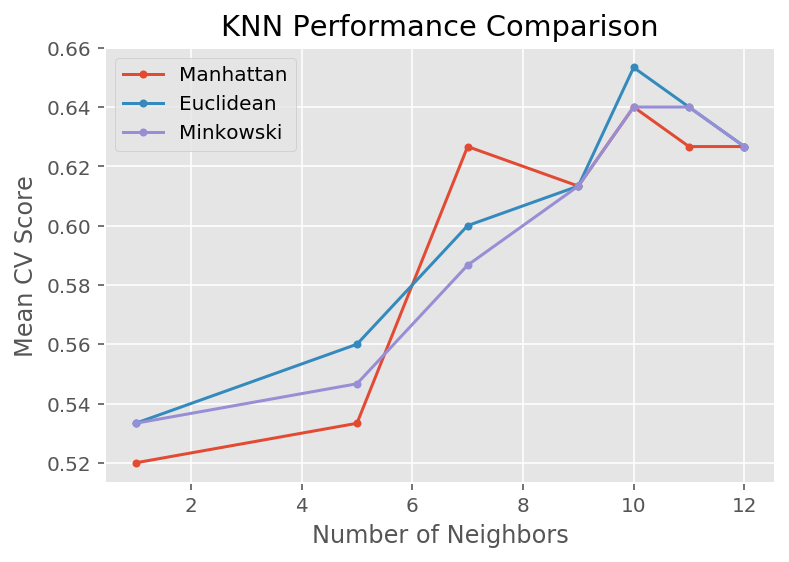

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = KNN_Results[KNN_Results['metric'] == i]
    plt.plot(temp['Neighbors'], temp['Score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

Best Score in all features

In [101]:
KNN_best_score_all_features_df=KNN_Results.sort_values(by=['Score'],ascending=False).head(1).reset_index()
KNN_best_score_all_features_df

,index,Neighbors,p,Score,metric
0,13,10.0,2.0,0.653333,Euclidean


### KNN Model with Selected  Features
We evaluate the score for KNN model with the selected features alone.

In [102]:
X=df.drop('DEATH_EVENT', axis='columns')
y=df['DEATH_EVENT']

In [103]:
X=X[selected_features_knn]
X=X.values

In [104]:
def Apply_KNN(n_neighbors,p):
    # takes in the parameters and applies to the  model to get the model score.
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,p=p)
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    cm=confusion_matrix(y_test,predicted)
    return clf.score(x_test,y_test)    

In [105]:
KNN_Results=pd.DataFrame(columns=['Neighbors','p','Score'])

In [106]:
def create_KNN():
    #try all set of parameters for the model
    for i in [1,5,7,9,10,11,12]:
        for j in [1,2,5]:
            KNN_Results.loc[len(KNN_Results)]=[i,j,Apply_KNN(i,j)]

In [107]:
create_KNN()

In [108]:
KNN_Results['metric']=KNN_Results['p'].replace([1,2,5],['Manhattan','Euclidean','Minkowski'])

In [109]:
KNN_Results

,Neighbors,p,Score,metric
0,1.0,1.0,0.746667,Manhattan
1,1.0,2.0,0.693333,Euclidean
2,1.0,5.0,0.720000,Minkowski
3,5.0,1.0,0.760000,Manhattan
4,5.0,2.0,0.746667,Euclidean
5,5.0,5.0,0.746667,Minkowski
6,7.0,1.0,0.733333,Manhattan
7,7.0,2.0,0.760000,Euclidean
8,7.0,5.0,0.746667,Minkowski
9,9.0,1.0,0.746667,Manhattan


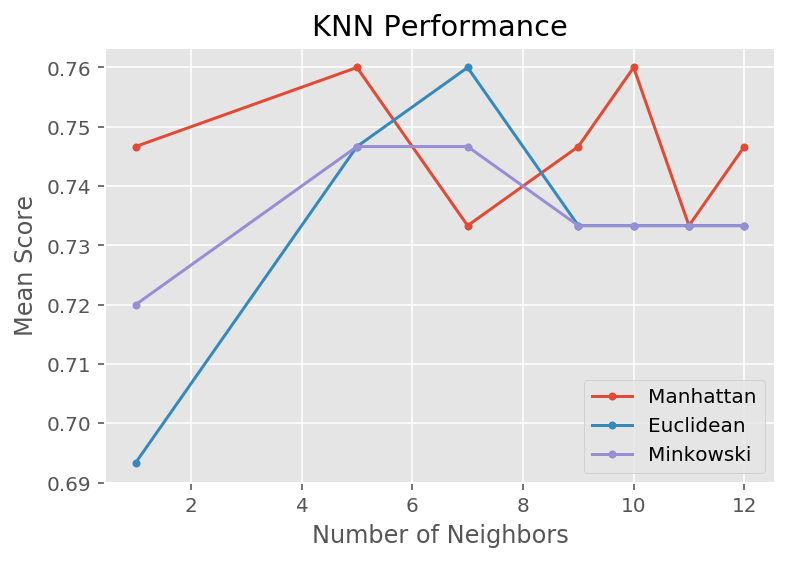

In [110]:
# plotting the graph to get idea of the how each parameter performs in the model.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = KNN_Results[KNN_Results['metric'] == i]
    plt.plot(temp['Neighbors'], temp['Score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean Score")
plt.title("KNN Performance")
plt.show()

In [111]:
# choose the best paramters from the above df
KNN_best_score_selected_features_df=KNN_Results.sort_values(by=['Score'],ascending=False).head(3).reset_index(drop=True)
KNN_best_score_selected_features_df

,Neighbors,p,Score,metric
0,5.0,1.0,0.76,Manhattan
1,7.0,2.0,0.76,Euclidean
2,10.0,1.0,0.76,Manhattan


### Applying Model with Selected Features and  parameters

In [112]:
X=df.drop('DEATH_EVENT', axis='columns')
y=df['DEATH_EVENT']
X=X[selected_features_knn]
X.head()

,creatinine_phosphokinase,smoking,anaemia,age,serum_creatinine,time,sex,serum_sodium,high_blood_pressure
0,582,0,0,75.0,1.9,4,1,130,1
1,7861,0,0,55.0,1.1,6,1,136,0
2,146,1,0,65.0,1.3,7,1,129,0
3,111,0,1,50.0,1.9,7,1,137,0
4,160,0,1,65.0,2.7,8,0,116,0


In [113]:
X=X.values #convert df to numpy values

In [114]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

In [115]:
# apply the parameters we found from the graph above.
clf=KNeighborsClassifier(n_neighbors=7,p=2) #selected parameters after paramter finetuning
fit=clf.fit(x_train,y_train)
predicted=fit.predict(x_test)
cm_KNN=confusion_matrix(y_test,predicted)
cm_KNN

array([[47,  1],
       [17, 10]])

In [116]:
clf.score(x_test,y_test)

0.76

In [117]:
Knn_classification_report=classification_report(y_test,predicted)
print(Knn_classification_report)

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        48
           1       0.91      0.37      0.53        27

    accuracy                           0.76        75
   macro avg       0.82      0.67      0.68        75
weighted avg       0.80      0.76      0.73        75



## Model 2:  Decision Tree
The reasoning behind choosing this model is that decision trees are are easy to interpret and visualize. Requires fewer data preprocessing from the user, for example, there is no need to normalize columns. Has no assumptions about distribution because of the non-parametric nature of the algorithm. Some drawbacks include sensitive to noisy data. It can overfit noisy data. The small variation(or variance) in data can result in the different decision tree and Decision trees are biased for an imbalanced dataset.

##### Wk 6 Decision Tree example

In [118]:
X=df.drop('DEATH_EVENT', axis='columns').values

In [119]:
y=df['DEATH_EVENT']

In [120]:
col_num=X.shape[1]
new_Ind=[]
cur_MaxScore=0.0
col_Ind_random=shuffle(range(0,col_num),random_state=1)

In [121]:
#Using Hill climbing for feature Selection
for cur_f in range(0,col_num):
    new_Ind.append(col_Ind_random[cur_f])
    newData=X[:,new_Ind].copy()
    x_train,x_test,y_train,y_test=train_test_split(newData,y,test_size=0.25,random_state=0)
    clf=DecisionTreeClassifier()
    fit=clf.fit(x_train,y_train)
    cur_Score=clf.score(x_test,y_test)
    if cur_Score<cur_MaxScore:
        new_Ind.remove(col_Ind_random[cur_f])
    else:
        cur_MaxScore=cur_Score
        print("Score with "+str(len(new_Ind))+" Selected features: "+str(cur_Score))

Score with 1 Selected features: 0.6
Score with 2 Selected features: 0.6666666666666666
Score with 3 Selected features: 0.7733333333333333
Score with 4 Selected features: 0.8133333333333334


In [122]:
new_Ind

[2, 10, 11, 9]

In [123]:
# best features selected for DT model.
selected_features_DT=df.columns[new_Ind].tolist()
selected_features_DT

['creatinine_phosphokinase', 'smoking', 'time', 'sex']

### Decision Tree Model with All set of Features¶

In [124]:
X=df.drop('DEATH_EVENT', axis='columns').values
y=df['DEATH_EVENT']

In [125]:
def Apply_DT(criterion,max_depth,min_samples_split):
    # takes in the parameters and applies to the  model to get the model score.
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)
    clf=DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split)
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    cm=confusion_matrix(y_test,predicted)
    return clf.score(x_test,y_test)    
    

#### Parameter Tuning Features 
* **criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
* **splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
* **max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [126]:
DT_Results=pd.DataFrame(columns=['criterion','max_depth','min_samples_split','Score'])

In [127]:
def create_DT():
    #try all set of parameters for the model
    max_depth=[1,2,3,4,5,6,7,8]
    min_samples_split=[2,3]
    for criterion in ['gini','entropy']:
        for i in max_depth :
            for j in min_samples_split:
                DT_Results.loc[len(DT_Results)]=[criterion,i,j,Apply_DT(criterion,i,j)]

In [128]:
create_DT()

In [129]:
DT_Results

,criterion,max_depth,min_samples_split,Score
0,gini,1,2,0.826667
1,gini,1,3,0.826667
2,gini,2,2,0.826667
3,gini,2,3,0.826667
4,gini,3,2,0.866667
5,gini,3,3,0.866667
6,gini,4,2,0.813333
7,gini,4,3,0.813333
8,gini,5,2,0.800000
9,gini,5,3,0.813333


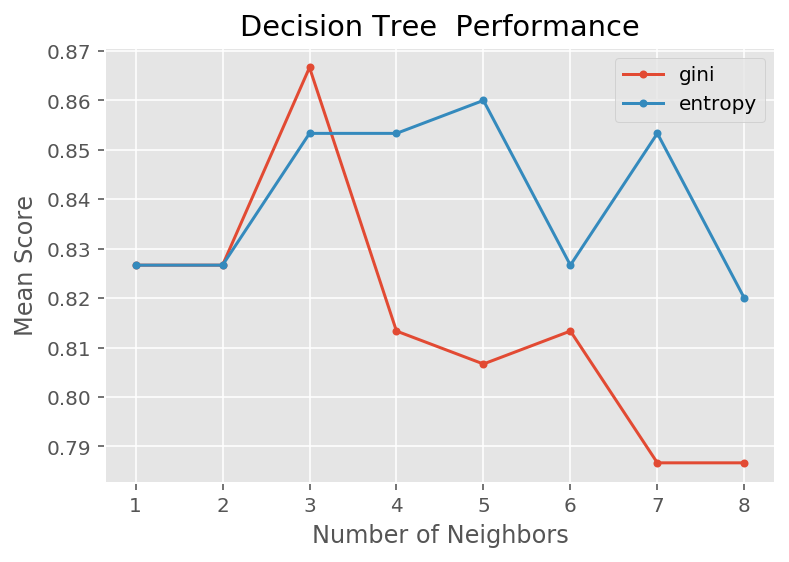

In [130]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["gini", "entropy"]:
    temp = DT_Results[DT_Results['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'Score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean Score")
plt.title("Decision Tree  Performance")
plt.show()

In [131]:
# Best Score in all features
DT_best_score_all_features_df=DT_Results.sort_values(by=['Score'],ascending=False).head(2).reset_index()
DT_best_score_all_features_df

,index,criterion,max_depth,min_samples_split,Score
0,29,entropy,7,3,0.866667
1,4,gini,3,2,0.866667


### Decision Tree  Model with Selected Features

In [132]:
X=df.drop('DEATH_EVENT', axis='columns')
y=df['DEATH_EVENT']

In [133]:
X=X[selected_features_DT]
X.head()

,creatinine_phosphokinase,smoking,time,sex
0,582,0,4,1
1,7861,0,6,1
2,146,1,7,1
3,111,0,7,1
4,160,0,8,0


In [134]:
X=X.values

In [135]:
def Apply_DT(criterion,max_depth,min_samples_split):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)
    clf=DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split)
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    cm=confusion_matrix(y_test,predicted)
    return clf.score(x_test,y_test)    
    

In [136]:
DT_Results=pd.DataFrame(columns=['criterion','max_depth','min_samples_split','Score'])

In [137]:
def create_DT():
    max_depth=[1,2,3,4,5,6,7,8]
    min_samples_split=[2,3]
    for criterion in ['gini','entropy']:
        for i in max_depth :
            for j in min_samples_split:
                DT_Results.loc[len(DT_Results)]=[criterion,i,j,Apply_DT(criterion,i,j)]

In [138]:
DT_Results=pd.DataFrame(columns=['criterion','max_depth','min_samples_split','Score'])

In [139]:
def create_DT():
    max_depth=[1,2,3,4,5,6,7,8]
    min_samples_split=[2,3]
    for criterion in ['gini','entropy']:
        for i in max_depth :
            for j in min_samples_split:
                DT_Results.loc[len(DT_Results)]=[criterion,i,j,Apply_DT(criterion,i,j)]

In [140]:
create_DT()

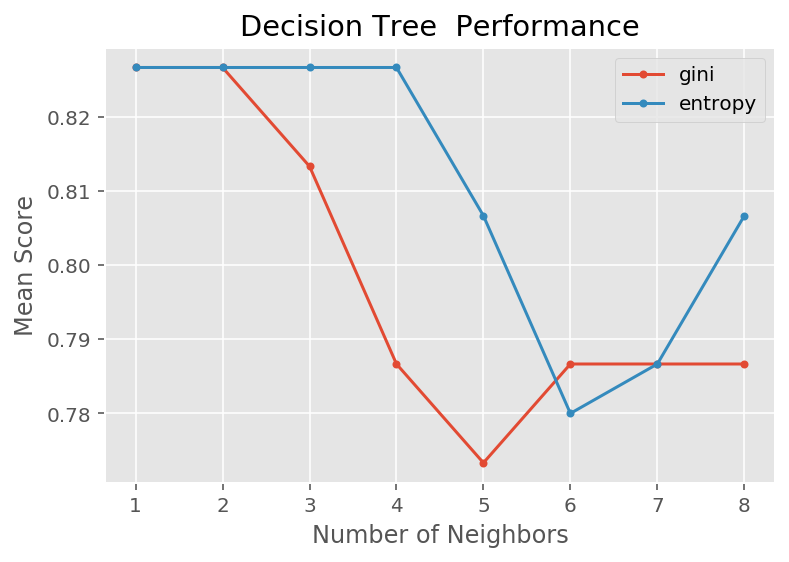

In [141]:
# plot the graph to get idea of the how each parameter performs in the model.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["gini", "entropy"]:
    temp = DT_Results[DT_Results['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'Score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean Score")
plt.title("Decision Tree  Performance")
plt.show()

In [142]:
# Best Score in selected features and choose the best paramters from the df
DT_best_score_selected_features_df=DT_Results.sort_values(by=['Score'],ascending=False).head(2).reset_index(drop=True)
DT_best_score_selected_features_df

,criterion,max_depth,min_samples_split,Score
0,gini,1,2,0.826667
1,gini,1,3,0.826667


### Applying DT  Model with Selected Features and Selected parameter

In [143]:
X=df.drop('DEATH_EVENT', axis='columns')
y=df['DEATH_EVENT']
X=X[selected_features_DT]
X.head()

,creatinine_phosphokinase,smoking,time,sex
0,582,0,4,1
1,7861,0,6,1
2,146,1,7,1
3,111,0,7,1
4,160,0,8,0


In [144]:
X=X.values

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

In [146]:
clf=DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=4) #applying selected paramters from above
fit=clf.fit(x_train,y_train)
y_pre=fit.predict(x_test)
y_pre

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0])

In [147]:
cm_DT=confusion_matrix(y_test,y_pre)
cm_DT

array([[42,  6],
       [10, 17]])

In [148]:
clf.score(x_test,y_test)

0.7866666666666666

In [149]:
DT_classification_report=classification_report(y_test,y_pre)
print(DT_classification_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.74      0.63      0.68        27

    accuracy                           0.79        75
   macro avg       0.77      0.75      0.76        75
weighted avg       0.78      0.79      0.78        75



## Model Comparison

In [150]:
# KNN 
print("KNN CLASSIFICATION REPORT\n")
print(Knn_classification_report)
print("\n")
print('Confusion Matrix of KNN\n',cm_KNN)

KNN CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        48
           1       0.91      0.37      0.53        27

    accuracy                           0.76        75
   macro avg       0.82      0.67      0.68        75
weighted avg       0.80      0.76      0.73        75



Confusion Matrix of KNN
 [[47  1]
 [17 10]]


In [151]:
# Decision Tree
print("Decision Tree CLASSIFICATION REPORT\n")
print(DT_classification_report)
print("\n")
print('Confusion Matrix of DT\n',cm_DT)

Decision Tree CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.74      0.63      0.68        27

    accuracy                           0.79        75
   macro avg       0.77      0.75      0.76        75
weighted avg       0.78      0.79      0.78        75



Confusion Matrix of DT
 [[42  6]
 [10 17]]
